In [1]:
import scvelo as scv
import scanpy as sc
from matplotlib import rcParams
scv.logging.print_version()

SURAG CHANGED utils.py
Running scvelo 0.2.2 (python 3.8.2) on 2020-10-11 05:53.


In [87]:
adata = scv.datasets.dentategyrus()
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

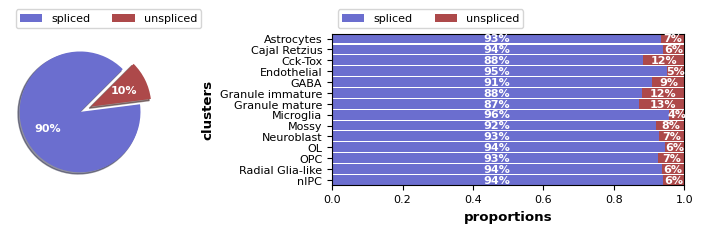

In [90]:
scv.pl.proportions(adata)

In [89]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 10340 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


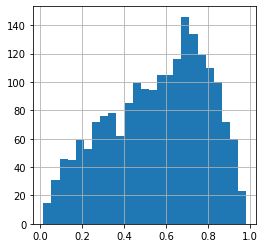

In [148]:
rcParams['figure.figsize'] = 4, 4
import pandas as pd
pd.DataFrame(adata.layers['velocity']>=0).mean(0).hist(bins=25)

In [5]:
scv.tl.velocity(adata, mode='stochastic')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [6]:
scv.tl.velocity_graph(adata)

SURAG UNCOMMENTED velocity_graph.py
computing velocity graph
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


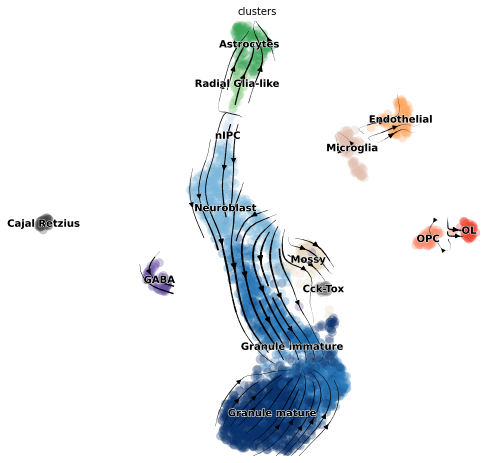

In [7]:
rcParams['figure.figsize'] = 8, 8

scv.pl.velocity_embedding_stream(adata, basis='umap')

In [8]:
scv.tl.rank_velocity_genes(adata, groupby='clusters', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,Astrocytes,Cajal Retzius,Cck-Tox,Endothelial,GABA,Granule immature,Granule mature,Microglia,Mossy,Neuroblast,OL,OPC,Radial Glia-like,nIPC
0,Phkg1,Dpysl3,Golga7b,Serpine2,Vsnl1,Shisa9,Sgsm2,Srgap2,Chgb,Mt3,Gprc5b,Hmgcs1,2810459M11Rik,Smarcc1
1,Ctnnd2,Tmem47,Rab3c,Ptprg,Lancl1,Jph1,Ntng1,Clic4,Pgm2l1,Gdpd1,Clmn,Luzp2,Hepacam,Igfbpl1
2,Lsamp,Sh3glb1,Irf9,Prex2,Mtus2,Sphkap,Grasp,Ssh2,Fxyd1,Slc38a2,Pcdh9,Ppp1r14c,Ctnnd2,Bzw2
3,Qk,Scg3,Cplx2,Arhgap31,Stmn2,Pgbd5,2010300C02Rik,Qk,Mapk6,Bzw2,Gatm,Elavl3,Sparcl1,Tbrg4
4,Cspg5,Pacrg,Ptprd,Arrdc2,Elavl3,Gabrb3,Wasf1,Hn1,Osbpl6,Epha4,Tmeff2,Lsamp,Lsamp,Rps27l


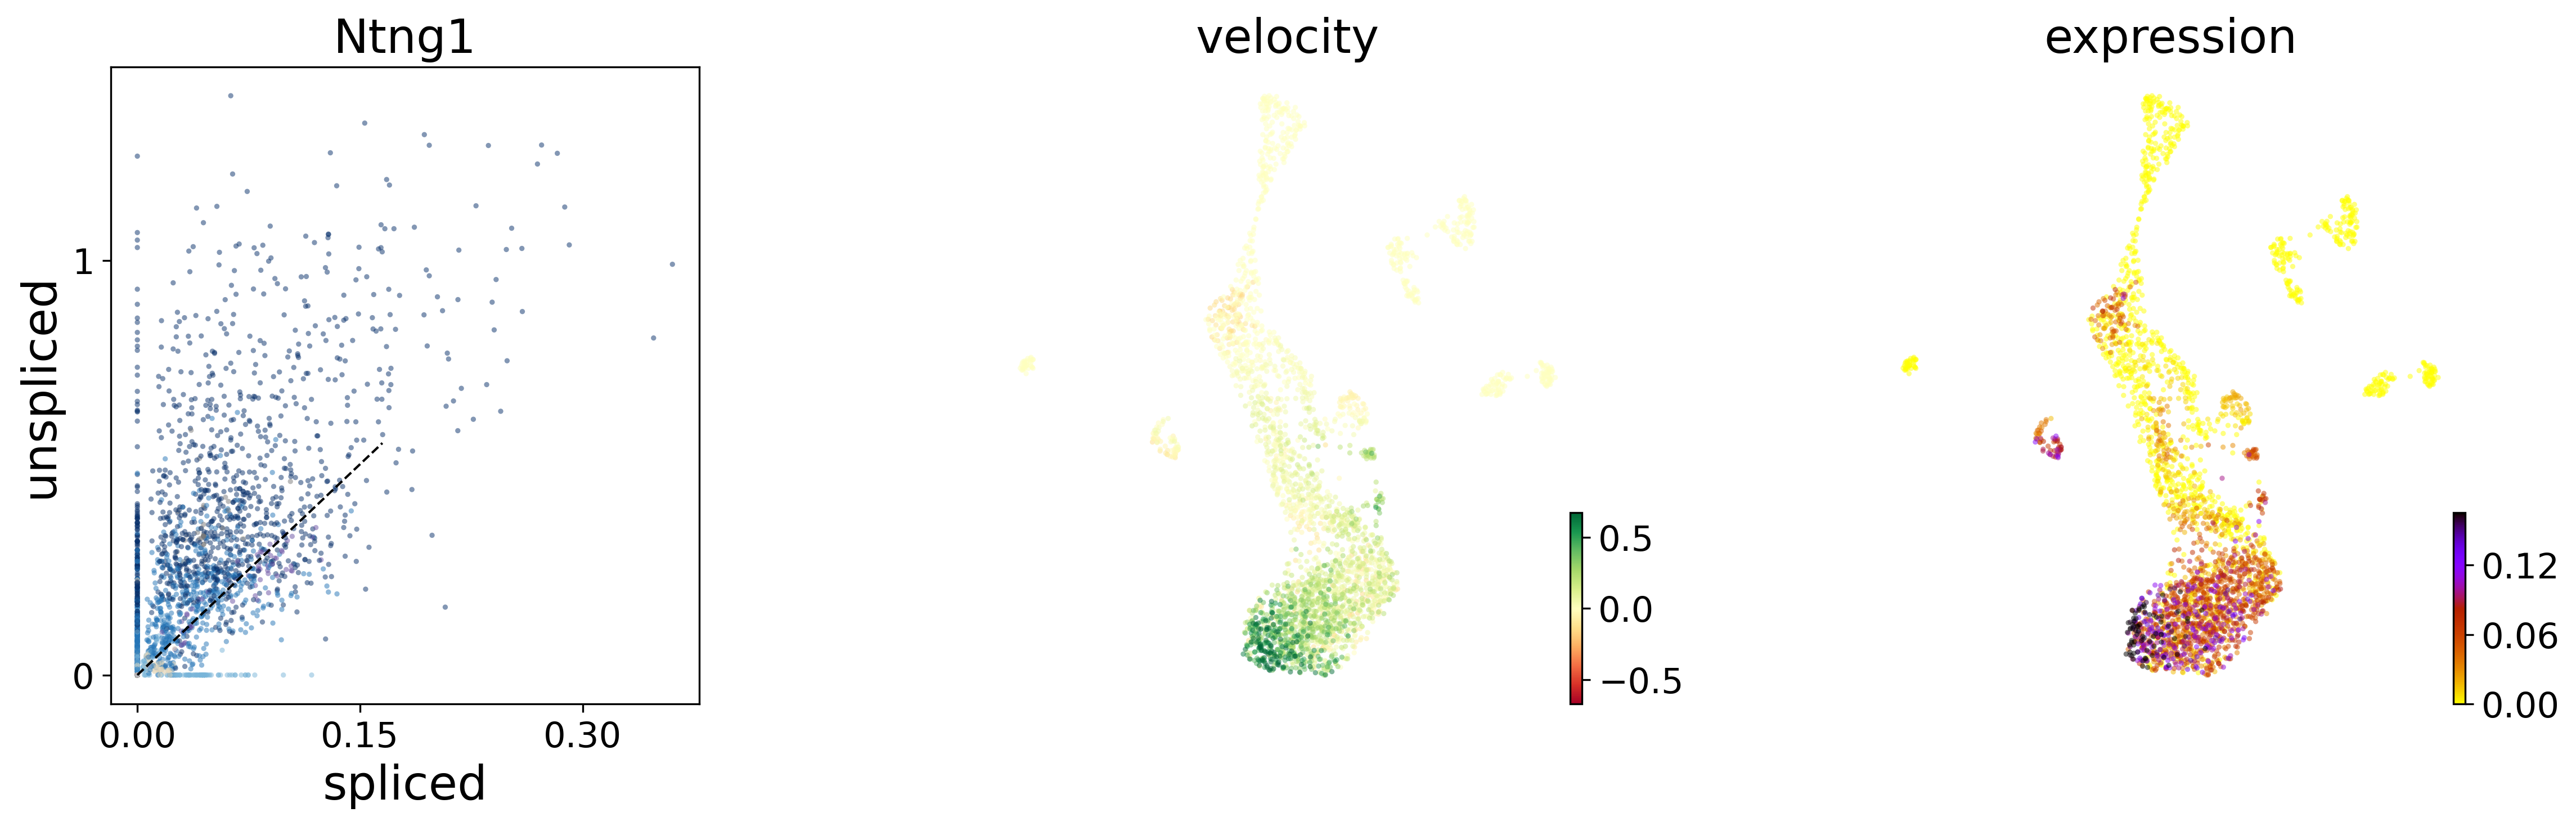

In [42]:
rcParams['figure.figsize'] = 12, 10

scv.pl.velocity(adata, 
                ['Ntng1'], 
                size=20, 
                fontsize=20,
                dpi=300,
                ncols=1)

In [71]:
scv.tl.velocity_graph(adata, 
                      gene_subset=df['Granule immature'][:1]
#                       gene_subset=list(adata.uns['rank_genes_groups']['names']['Delta'])[:5]
                     )

SURAG UNCOMMENTED velocity_graph.py
computing velocity graph


ValueError: need at least one array to concatenate

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


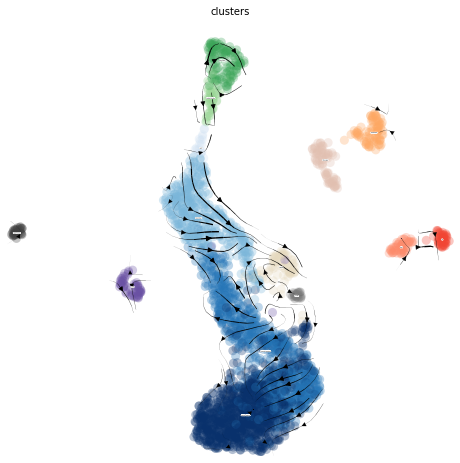

In [70]:
rcParams['figure.figsize'] = 8, 8

scv.pl.velocity_embedding_stream(adata, basis='umap', legend_fontsize=0)

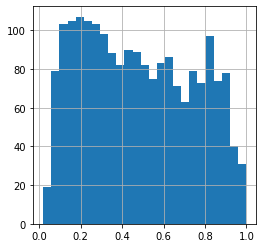

In [81]:
rcParams['figure.figsize'] = 4, 4
import pandas as pd
pd.DataFrame(adata.layers['velocity']>=0).mean(0).hist(bins=25)